In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Bank Churn Modelling.csv")

# Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.duplicated("CustomerId").sum()

0

### Here we sum() method to add all boolean value, the answer is zero signifying that there are no duplicate values

In [8]:
df = df.set_index("CustomerId")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [10]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Encoding : In here we convert all object data type in integer or float as we cannot apply ML on object data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [12]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [14]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)

In [17]:
df["Num Of Products"].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
df.replace({'Num Of Products':{'1':0,'2':1,'3':1,'4':1}},inplace=True)

In [20]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [21]:
df['Zero Balance'] = np.where(df["Balance"]>0,1,0)

In [22]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,1,1,1,101348.88,1,0
15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0,1
15619304,Onio,502,2,1,42,8,159660.80,3,1,0,113931.57,1,1
15701354,Boni,699,2,1,39,1,0.00,2,0,0,93826.63,0,0
15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0,1


# Define Lable and Features

In [23]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
X = df.drop(["Surname","Churn"],axis=1)

In [25]:
y = df["Churn"]

In [26]:
X.shape,y.shape

((10000, 11), (10000,))

## Handling Imbalance Data

In [27]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

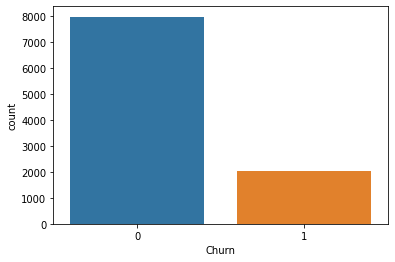

In [28]:
sns.countplot(x="Churn",data=df)

# Random Undersampling - May lose data

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rus = RandomUnderSampler(random_state=2529)

In [33]:
X_rus,y_rus = rus.fit_resample(X,y)

In [36]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

# Random Oversampling - We do not lose data

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
ros = RandomOverSampler(random_state=2529)

In [41]:
X_ros,y_ros = ros.fit_resample(X,y)

In [42]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

# Test Train split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=2529)

In [45]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.3,train_size=0.7,random_state=2529)

In [46]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros,test_size=0.3,train_size=0.7,random_state=2529)

# Preprocessing

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [50]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [51]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [52]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [56]:
svc = SVC()

In [60]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [61]:
svc.fit(X_train_rus,y_train_rus)
y_pred_rus = svc.predict(X_test_rus)

In [62]:
svc.fit(X_train_ros,y_train_ros)
y_pred_ros = svc.predict(X_test_ros)

# Model Accuracy

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000



In [69]:
confusion_matrix(y_test_rus,y_pred_rus)
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [70]:
confusion_matrix(y_test_ros,y_pred_ros)
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2379
           1       0.80      0.74      0.77      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



# Hyperparameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'class_weight':['balanced']
}

In [85]:
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)


In [86]:
  grid.fit(X_train,y_train)  

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   1.7s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   1.6s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   1.2s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   1.2s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   1.3s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   1.4s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   1.5s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   1.5s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   1.0s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   1.0s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   1.2s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [89]:
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

SVC(C=1, class_weight='balanced', gamma=1)
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.52      0.53      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



## Under Sampling

In [95]:
grid.fit(X_train_rus,y_train_rus) 

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   0.3s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   0.3s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   0.2s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   0.3s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   0.4s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   0.3s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   0.2s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   0.3s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   0.2s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   0.2s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   0.2s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [96]:
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_rus)
print(classification_report(y_test_rus,grid_predictions))

SVC(C=1, class_weight='balanced', gamma=0.1)
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.69      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



## Over Sampling

In [97]:
grid.fit(X_train_ros,y_train_ros) 


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   5.7s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   5.5s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   3.8s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   3.8s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   4.3s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   4.4s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   4.2s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   4.8s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   3.6s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   3.7s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   4.3s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [98]:
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_ros)
print(classification_report(y_test_ros,grid_predictions))

SVC(C=10, class_weight='balanced', gamma=1)
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2379
           1       0.89      0.98      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778

